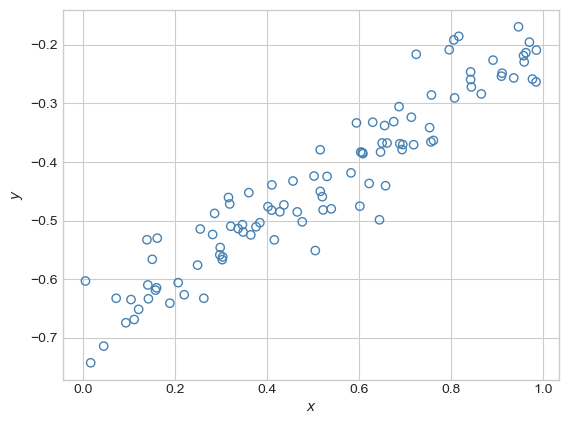

In [83]:
import torch
from matplotlib import pyplot as plt 
plt.style.use('seaborn-v0_8-whitegrid')

def regression_data(n = 100, w = torch.Tensor([-0.7, 0.5]), x_max = 1):

    x = torch.rand(n)*x_max
    y = x*w[1] + w[0] + 0.05*torch.randn(n)
    return x, y

x, y = regression_data()
# print(f"{x=}")
# print(f"{y=}")

plt.scatter(x, y, facecolors = "none", edgecolors = "steelblue")
labs = plt.gca().set(xlabel = r"$x$", ylabel = r"$y$")

In [84]:
import random

def SGD(x, y, alpha, epochs):

    w_0 = 0.5
    w_1 = 0.5
    risk_vec = []

    for t in range(1, epochs+1):
        
        # Permute the data indices in a random order.
        indices = list(range(len(x)))
        random.shuffle(indices)

        # Then, for each data index i (in the permuted order), perform the following two updates:
        for i in range(len(indices)):
            
            y_i = y[i]
            x_i = x[i]
           
            # update w_0 and w_1 based on SGD formula
            error = y_i - w_1 * x_i - w_0
            w_0 += ((2 * alpha)/ t)* w_0 * error
            w_1 += ((2 * alpha)/ t)* w_1 * error * x_i

        # Calculate the risk for the current w_0 and w_1
        little_risk = (y - w_1 * x - w_0)**2
        risk = torch.mean(little_risk)
        risk_vec.append(risk.item())
        
    return risk_vec

risk_vec=[0.20837946236133575, 0.20835325121879578]
risk_vec=[0.20837946236133575, 0.20835325121879578, 0.2083527147769928, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.2083526998758316, 0.20835269987583

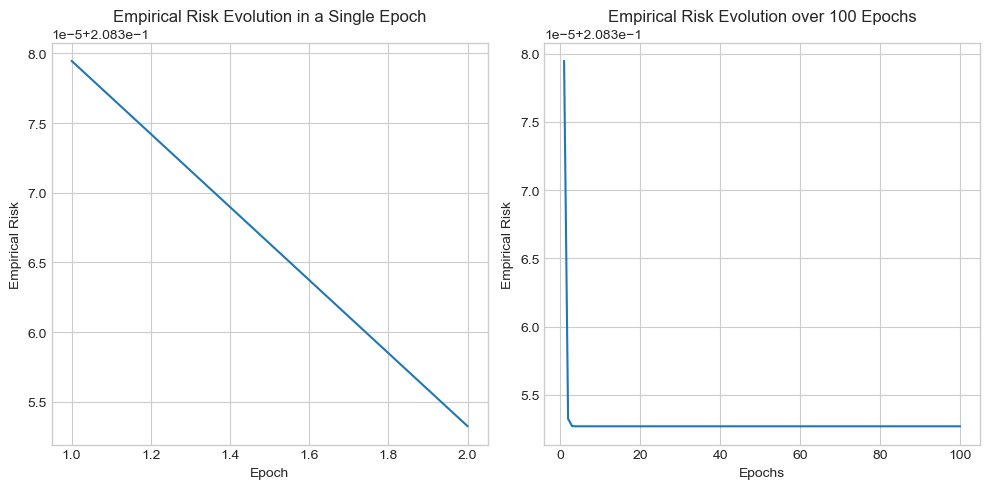

In [85]:
plt.figure(figsize=(10, 5))

alpha = 0.2

# Plotting the empirical risk during a single epoch
risk_vec = SGD(x, y, alpha, 2) ## so we get risk after one update! (technically update twice)
print(f"{risk_vec=}")

plt.subplot(1, 2, 1)
plt.plot(range(1, len(risk_vec) + 1), risk_vec)
plt.xlabel('Epoch')
plt.ylabel('Empirical Risk')
plt.title('Empirical Risk Evolution in a Single Epoch')

# Plotting the empirical risk over 100 epochs
risk_vec= SGD(x, y, alpha, 100)
print(f"{risk_vec=}")

plt.subplot(1, 2, 2)
plt.plot(range(1, len(risk_vec) + 1), risk_vec)
plt.xlabel('Epochs')
plt.ylabel('Empirical Risk')
plt.title('Empirical Risk Evolution over 100 Epochs')

plt.tight_layout()
plt.show()